## Importação das Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Carregando dataset

In [2]:
df = pd.read_csv('dogs_cats.csv', index_col=0)

In [3]:
df['classe'] = df['classe'].replace('cachorro', 0) 
df['classe'] = df['classe'].replace('gato', 1)
df

,comprimento,peso,classe
0,45.231415,431.548671,0
1,38.003753,517.870914,1
2,53.608592,444.025762,0
3,39.315731,524.066579,1
4,45.581301,450.552000,0
...,...,...,...
1995,37.590457,587.274926,1
1996,43.818870,416.846089,0
1997,36.876470,483.215531,1
1998,49.415613,514.637485,0


In [4]:
dataset = []

for index, row in df.iterrows():
    input  = row[['comprimento', 'peso']].values
    target = row['classe']
    dataset.append((input,int(target)))

## Visualização dos dados

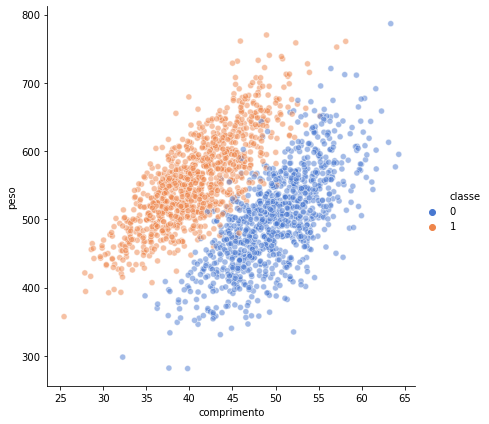

In [5]:
sns.relplot(x="comprimento", y="peso", hue="classe",
            alpha=.5, palette="muted",
            height=6, data=df)

## Sigmoid

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
def relu(x):
    return np.maximum(0,x)

## Perceptron

In [8]:
def perceptron(inputs, weights):
    
    # Definição do somatório dos produtos das entradas com os pesos 
    o = np.sum(inputs * weights)
    
    # Retorna o resultado do somatório aplicado à função sigmoid
    y = sigmoid(o)
    
    return y

In [9]:
# Função de atualização dos pesos do perceptron
def update_weights(inputs, weights, y, t, neta):
    return weights + neta * (t-y) * inputs * (y * (1-y))

## Avaliação

In [10]:
# Função avaliação
def evaluate(weights,dataset):
    # true positives, true negatives, false positives, false negatives
    tp, tn, fp, fn = 0, 0, 0, 0
    
    for example, target in dataset:

        # Adiciona o bias nas entradas
        example = np.append(example, 1)
        
        # Pega a predição do perceptron
        y = perceptron(example, weights)
        
        # Ativação em 0.5
        if(y < 0.5):
            y = 0
        else:
            y = 1
        
        # Se a predição é igual ao valor real
        if y == target:
            # Então testa se é tp ou tn
            if y == 1:
                tp += 1
            else:
                tn += 1
        # Senão testa se é fn ou fp
        else:
            if y == 0:
                fn += 1
            else:
                fp += 1

    # Acurácia
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    
    # Sensitividade
    recall = tp/(tp+fn)
    
    # Especificidade
    specificity = tn/(tn+fp)
    
    # Retorna as métricas
    return accuracy, recall, specificity

## Treino

In [11]:
# Inicialização
weights = (np.random.rand(1,2) - 0.5)[0]
bias = (np.random.rand(1) - 0.5) 
weights = np.append(weights, bias)

neta = 0.1

# Implemente o treino aqui (para separar as duas classes definidas)
accuracies = []

for epoch in range(200):
    np.random.shuffle(dataset)
    
    # Para cada exemplo do dataset
    for example, target in dataset:
        
        # Adiciona o bias nas entradas do exemplo
        example = np.append(example, 1)
        
        # Passa as entradas do exemplo e os pesos para o perceptron
        y = perceptron(example, weights)
        
        # Atualiza os pesos
        weights = update_weights(example, weights, y, target, neta)
    
    # Calcula as métricas de avaliação para a época
    accuracy, recall, specificity = evaluate(weights,dataset)
    # Exibe-as na tela
    print('Época:', epoch, 'Acurácia:', accuracy, 'Sensitividade', recall, 'Especificidade:', specificity)

Época: 0 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 1 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 2 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 3 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 4 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 5 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 6 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 7 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 8 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 9 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 10 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 11 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 12 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 13 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 14 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 15 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 16 Acurácia

Época: 132 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 133 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 134 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 135 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 136 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 137 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 138 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 139 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 140 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 141 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 142 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 143 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 144 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 145 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 146 Acurácia: 0.5 Sensitividade 0.0 Especificidade: 1.0
Época: 147 Acurácia: 0.5 Sensitividade 0.0 Especificida

In [12]:
# Para cada exemplo do dataset
for example, target in dataset:
        
    # Adiciona o bias nas entradas do exemplo
    example = np.append(example, 1)
        
    # Passa as entradas do exemplo e os pesos para o perceptron
    y = perceptron(example, weights)
    
    print("true: " + str(target) + " predicted: " + str(y))

true: 0 predicted: 6.473366195255227e-20
true: 0 predicted: 1.2944979497028966e-26
true: 1 predicted: 6.594224271683199e-25
true: 0 predicted: 5.020326585966484e-30
true: 0 predicted: 7.92284981109302e-27
true: 1 predicted: 5.593598853283733e-27
true: 0 predicted: 1.7158017132737437e-23
true: 0 predicted: 8.155448909171067e-20
true: 1 predicted: 8.985392245116595e-27
true: 0 predicted: 1.8130266460123943e-21
true: 0 predicted: 4.372993704880203e-25
true: 0 predicted: 1.0769469352565192e-26
true: 1 predicted: 6.4813466688693345e-28
true: 0 predicted: 4.1404958977106645e-30
true: 0 predicted: 3.556325185054001e-24
true: 0 predicted: 7.135863258273387e-23
true: 0 predicted: 9.661855237484888e-25
true: 1 predicted: 1.5221542934820394e-33
true: 1 predicted: 3.0003885291677307e-28
true: 0 predicted: 1.2987612826395797e-18
true: 1 predicted: 1.4892669526158989e-30
true: 0 predicted: 1.9765742780331174e-27
true: 1 predicted: 2.656632863822091e-25
true: 1 predicted: 1.0033000348528847e-32
true:

true: 1 predicted: 5.142862837853185e-24
true: 0 predicted: 3.1998948012603516e-19
true: 1 predicted: 2.260318891706444e-28
true: 0 predicted: 1.9410758520039162e-21
true: 1 predicted: 1.1520713745260062e-27
true: 0 predicted: 4.0142147641176827e-29
true: 0 predicted: 3.344129488888184e-25
true: 1 predicted: 8.38857322227692e-30
true: 0 predicted: 2.1749901985765195e-31
true: 1 predicted: 4.58764188102976e-30
true: 1 predicted: 2.9576005458432406e-37
true: 1 predicted: 6.07385407472679e-26
true: 0 predicted: 8.902323159331167e-25
true: 0 predicted: 4.541988982620661e-19
true: 1 predicted: 1.928647541981916e-35
true: 0 predicted: 6.617104719446619e-21
true: 1 predicted: 2.2673771122143718e-32
true: 1 predicted: 8.217791610918272e-27
true: 0 predicted: 3.0588624961718007e-23
true: 0 predicted: 1.663281944030865e-21
true: 0 predicted: 2.926450022795488e-22
true: 0 predicted: 5.643198435160267e-19
true: 0 predicted: 1.9901148178112621e-28
true: 1 predicted: 1.394195008450909e-28
true: 1 pr